In [178]:
import pandas as pd
import matplotlib.pyplot as plt

def generateGraph(subject, catalog, year, szn):
    df = pd.read_csv(f'raw_data/{szn} {year}.csv')
    for section in df.loc[(df["Subject"] == subject) & (df["Catalog Nbr"] == catalog)]['Section']:

        row = df.loc[(df["Subject"] == subject) & (df["Catalog Nbr"] == catalog) & (df['Section'] == section)]

        rowHeaders = ["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D+", "D", "D-", "F", "CR", "NC", "I", "W"]

        updatedRows = []
        updatedHeaders = []
        row2 = list(row.to_dict('index').values())[0]
        for header in rowHeaders:
            if row2[header] >= 0:
                updatedRows.append(row2[header])
                updatedHeaders.append(header)

        fig = plt.figure(figsize = (10, 5))
        ax = fig.gca()
        my_cmap = plt.get_cmap("viridis")
        # creating the bar plot
        plt.bar(updatedHeaders, updatedRows, color=my_cmap.colors,
                width = 0.4, zorder=3)

        plt.xlabel("")
        plt.ylabel("")
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.grid(zorder=0)
        plt.title(f"{subject} {catalog}.{section}  {row['Instructor 1'].iloc[0]}  {szn} {year}", fontsize = 20)
        plt.savefig(f"{szn}{year}{subject}{catalog}-{section}.png")


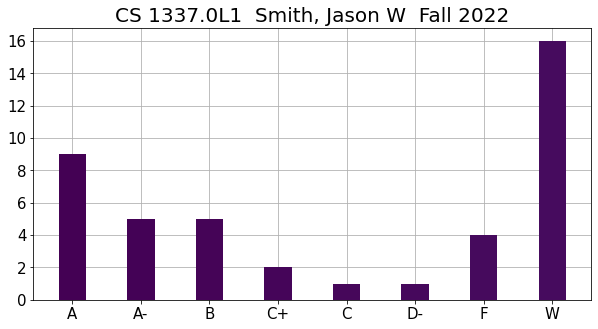

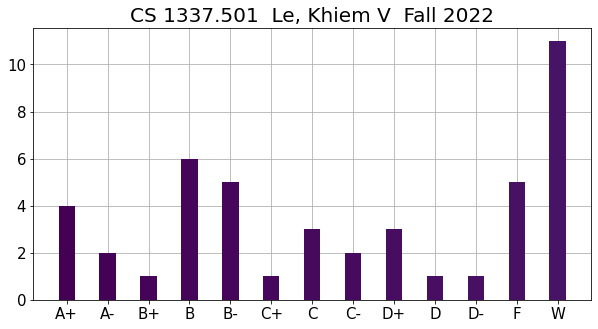

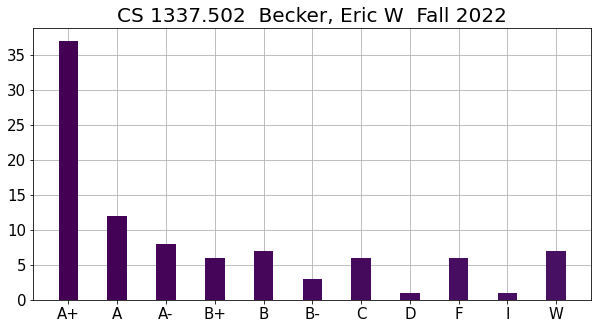

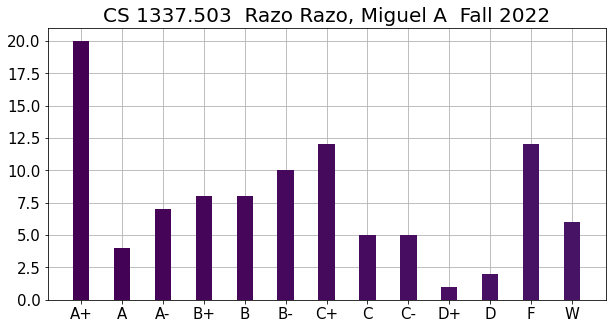

In [179]:
subject = "CS"
catalog = "1337"
year = "2022"
szn = "Fall"

generateGraph(subject, catalog, year, szn)